In [154]:
import matplotlib.pyplot as plt

In [155]:
import mesa as ms
import pylab as p
import numpy as np


%matplotlib inline 
p.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

data_path = "/home/evol/fragkos/disk1/mesa_projects/CE/example_runs/heat_base_1d39/LOGS/"
a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)

Process running in parallel on  48  cores
Process running in parallel on  48  cores


Process running in parallel on  48  cores


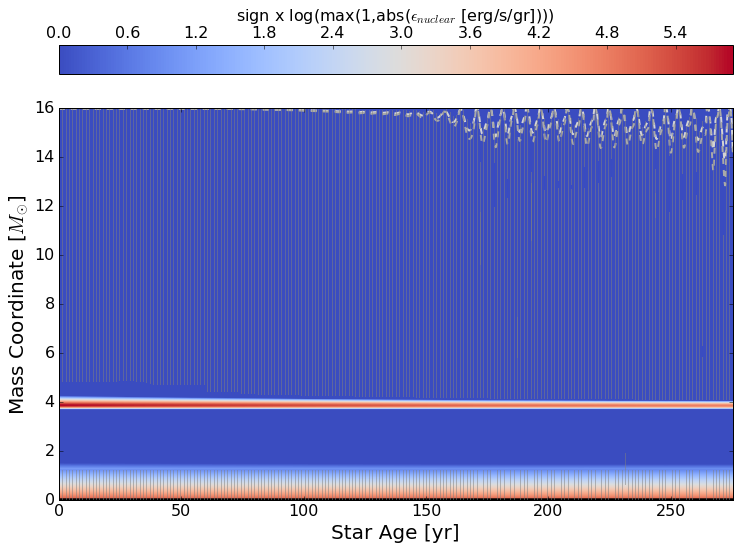

In [156]:
a.SetParameters(Variable='eps_nuc', cmap_dynamic_range=5, tau100=True, Yaxis='mass', Xaxis='star_age', czones=True)
a.Kippenhahn()

Process running in parallel on  48  cores


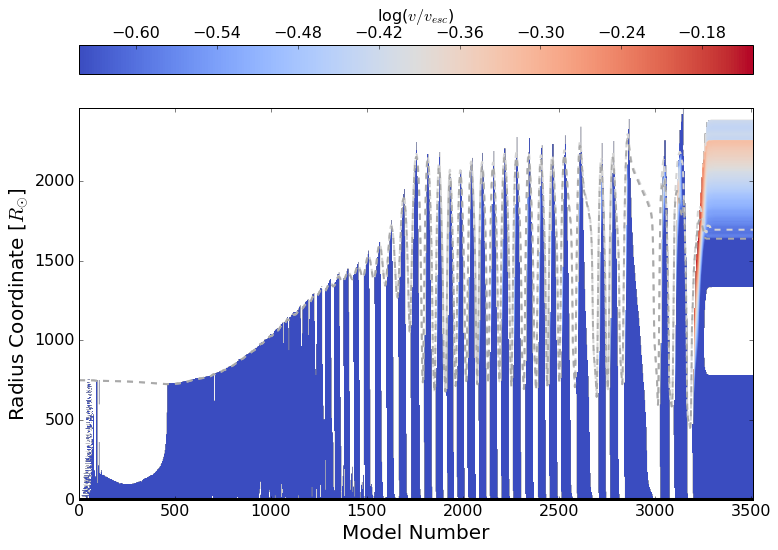

In [157]:
a.SetParameters(cmap_dynamic_range=0.5, signed_log_cmap=False,Yaxis='radius', Xaxis="model_number", Variable='v_div_vesc', czones=False)
a.Kippenhahn()

Process running in parallel on  48  cores


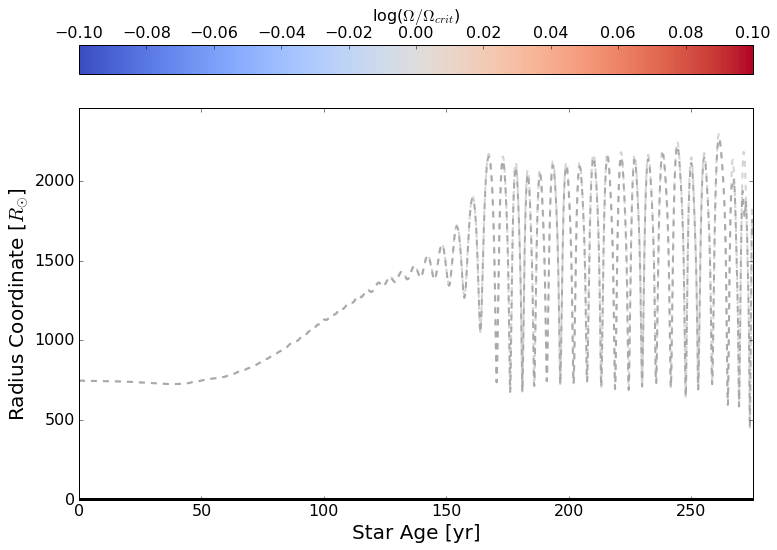

In [158]:
a.SetParameters(cmap_dynamic_range=5, signed_log_cmap=False,Yaxis='radius', Xaxis="star_age", Variable='omega_div_omega_crit')
a.Kippenhahn()

Process running in parallel on  48  cores


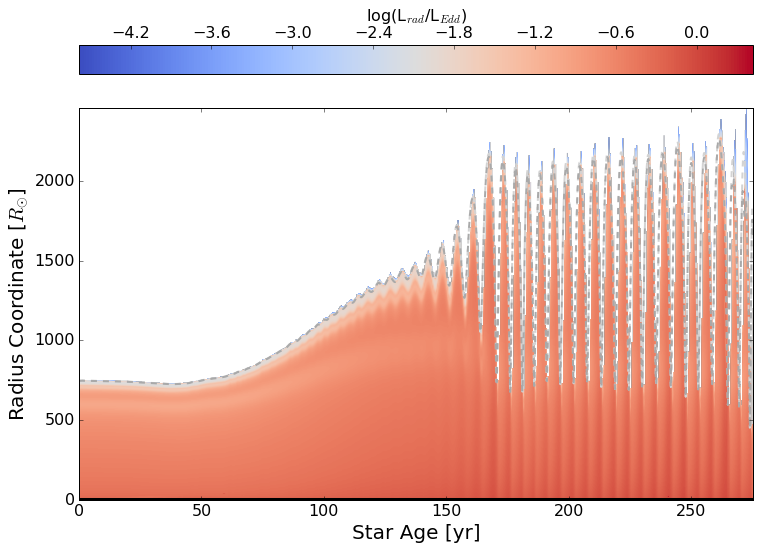

In [159]:
a.SetParameters(Variable='Lrad_div_Ledd', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


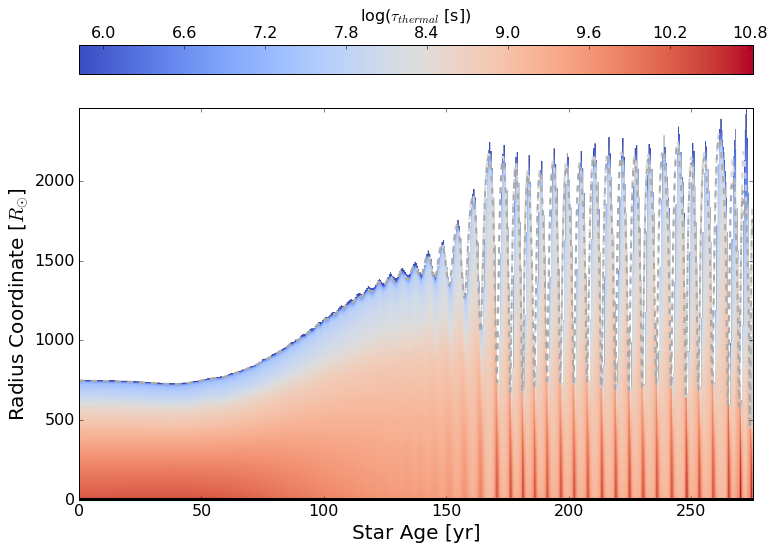

In [160]:
a.SetParameters(Yaxis="radius", Variable='t_thermal', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


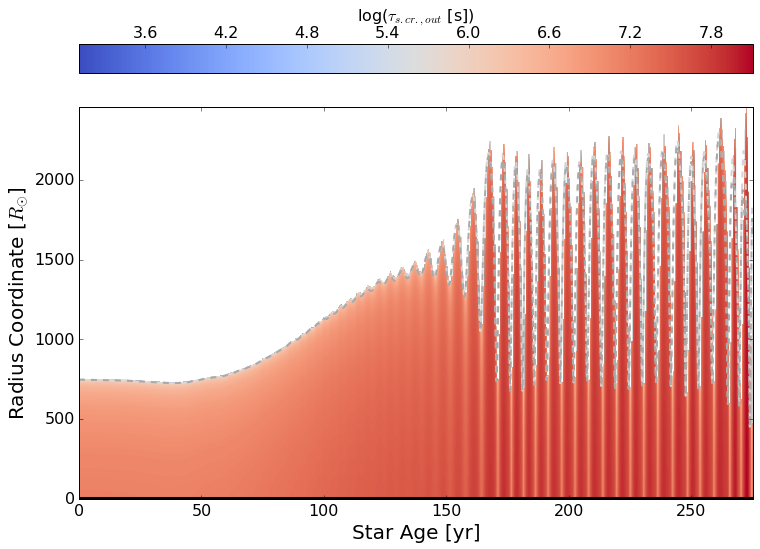

In [161]:
a.SetParameters(Yaxis="radius", Variable='t_dynamical', Xaxis="star_age", cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


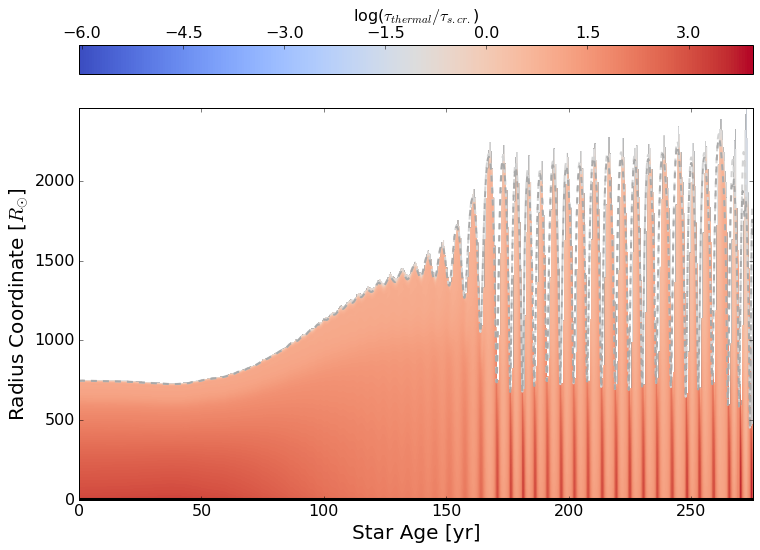

In [162]:
a.SetParameters(Yaxis="radius", Variable='t_thermal_div_t_dynamical', cmap_dynamic_range=10)
a.Kippenhahn()

Process running in parallel on  48  cores


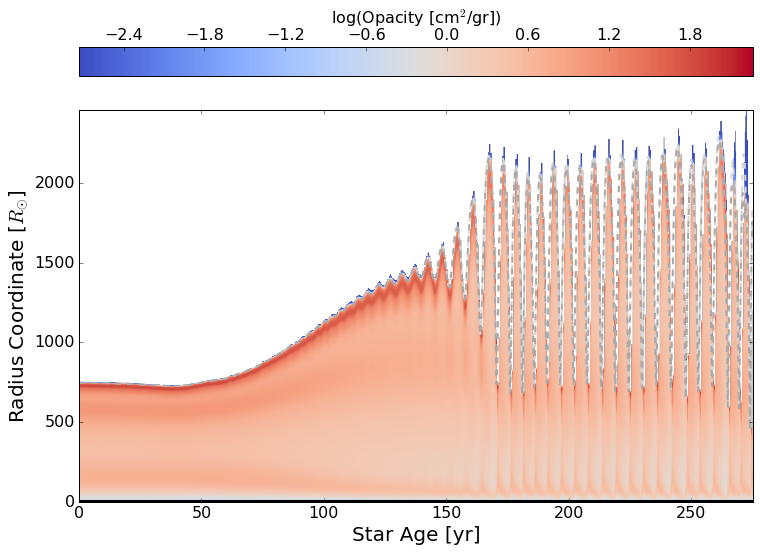

In [163]:
a.SetParameters(Yaxis="radius", Variable='opacity', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


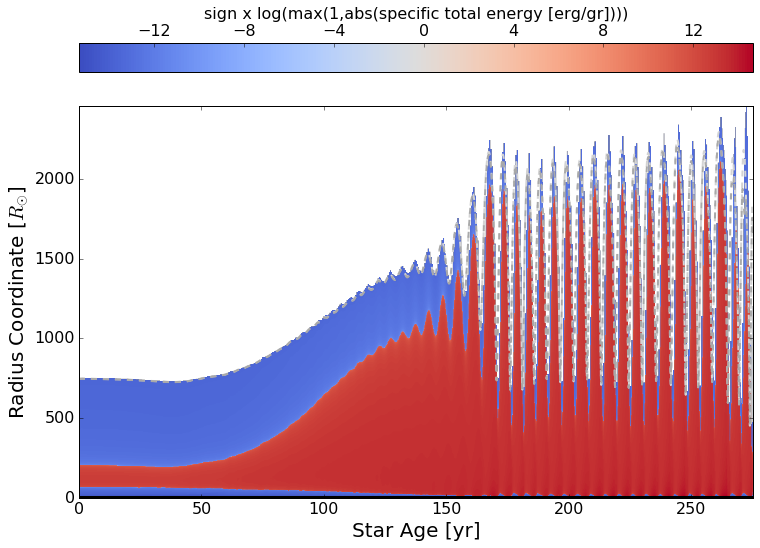

In [164]:
a.SetParameters(Variable='total_energy', cmap_dynamic_range=5,signed_log_cmap=True, tau100=True)
a.Kippenhahn()

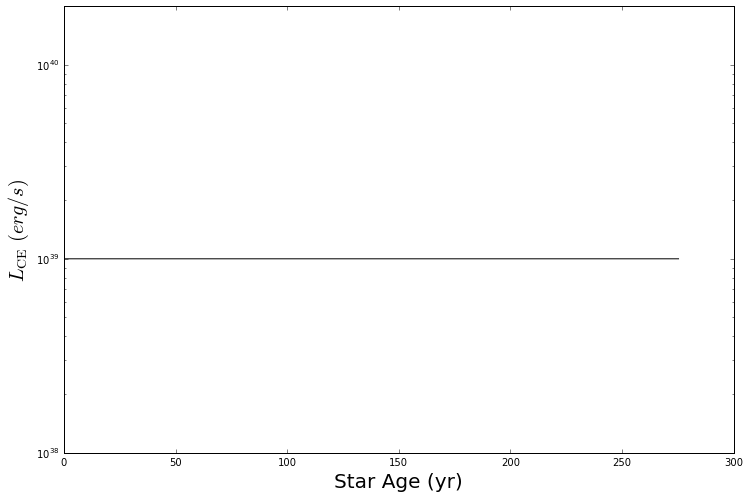

In [165]:
plt.plot(a.history['star_age'], a.history["CE_energy_rate"], color='k')
plt.xlabel('Star Age (yr)', size=20)
plt.ylabel(r'$L_{\rm CE}\ (erg/s)$', size=20)
plt.yscale('log')
plt.ylim(1.0e38, 2.0e40)
plt.show()

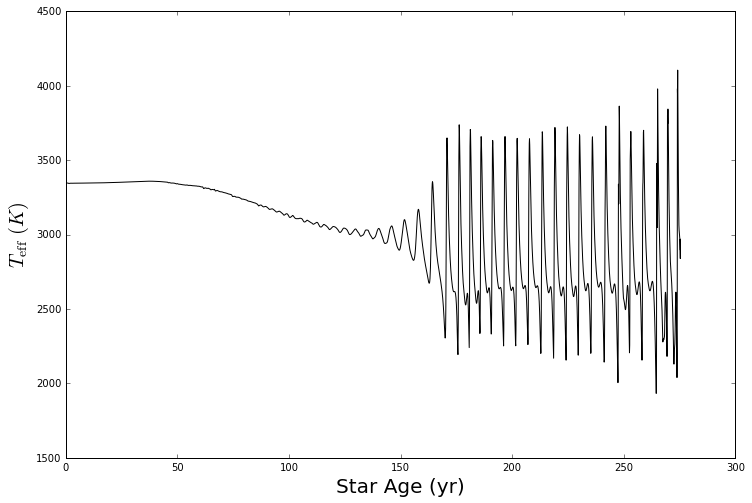

In [166]:
plt.plot(a.history['star_age'], 10**a.history["log_Teff"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r'$T_{\rm eff}\ (K)$', size=20)
plt.show()

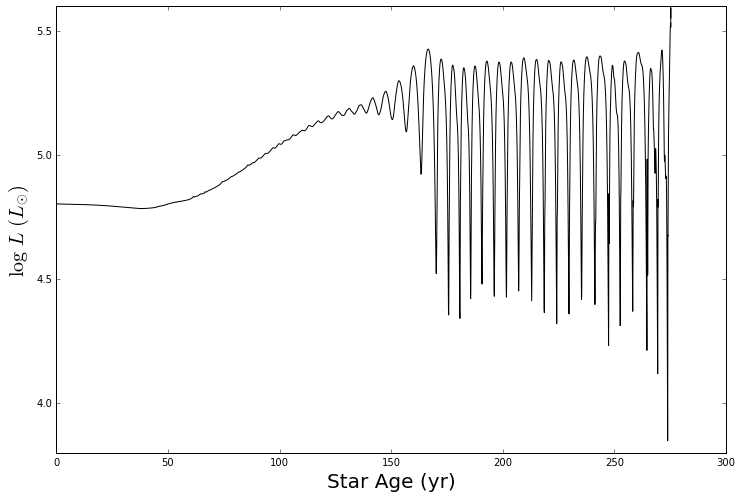

In [167]:
plt.plot(a.history['star_age'], a.history["log_L"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"${\rm log}\ L\ (L_{\odot})$", size=20)
plt.show()

[ 3.84856548  3.94049555  4.03242562  4.12435569  4.21628576  4.30821584
  4.40014591  4.49207598  4.58400605  4.67593612  4.76786619  4.85979627
  4.95172634  5.04365641  5.13558648  5.22751655  5.31944662  5.4113767
  5.50330677  5.59523684]
[ 3.72870283  3.72961303  3.73052323  3.73143343  3.73234363  3.73325383
  3.73416403  3.73507423  3.73598442  3.73689462  3.73780482  3.73871502
  3.73962522  3.74053542  3.74144562  3.74235581  3.74326601  3.74417621
  3.74508641  3.74599661]


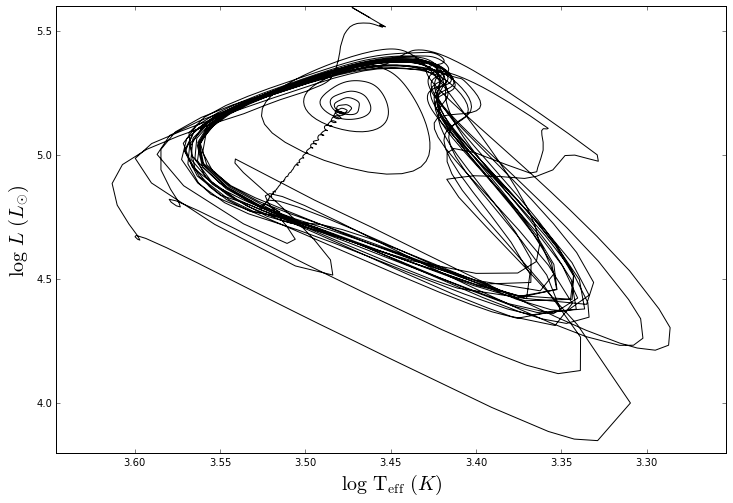

In [173]:
plt.plot(a.history['log_Teff'], a.history["log_L"], color='k')
xwidth = max(a.history['log_Teff']) - min(a.history['log_Teff'])
plt.xlim(0.1*xwidth + max(a.history['log_Teff']), -0.1*xwidth + min(a.history['log_Teff']))
plt.xlabel(r"${\rm log}\ {\rm T}_{\rm eff}\ (K)$", size=20)
plt.ylabel(r"${\rm log}\ L\ (L_{\odot})$", size=20)
aa=1
bb=4
MM =16.
AA = 1./101.
BB = 7./51.
CC = 13./51.
DD = np.log10(4000)
logL_hayashi = np.linspace(np.min(a.history["log_L"]), np.max(a.history["log_L"]), num=20)
logTeff_hayashi = AA*logL_hayashi + BB* np.log10(MM) + CC*np.log10(0.5) + DD
print logL_hayashi
print logTeff_hayashi
plt.plot(logTeff_hayashi, logL_hayashi, color='g')
plt.show()

4.245186229e+49


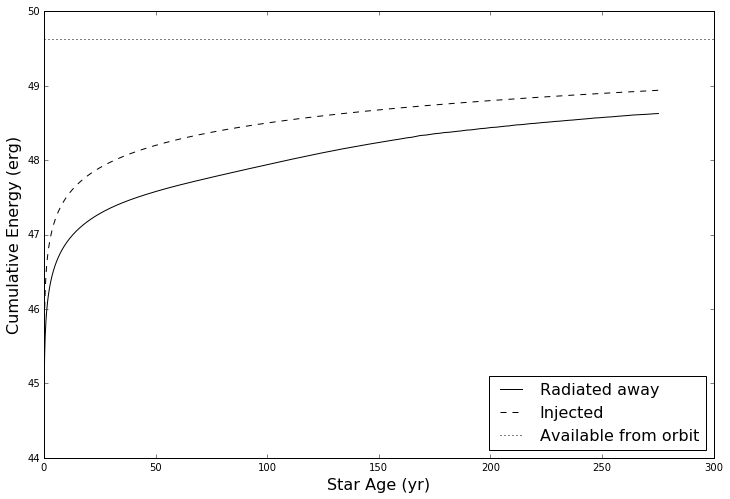

In [174]:
secyer = 31622400.0

lum = 10.0**a.history['log_L']
time_step = 10.0**a.history['log_dt'] * secyer
time = a.history["star_age"]

E_rad = np.cumsum(lum*time_step)
plt.plot(time, np.log10(E_rad * 3.839e33), color='k', label="Radiated away")


E_CE = np.cumsum(time_step*a.history["CE_energy_rate"])
plt.plot(time, np.log10(E_CE), color='k', linestyle='dashed', label="Injected")

Msun = 1.988e33
G = 6.6725e-8
Rsun = 6.957e10
E_available = G*a.history['he_core_mass'][-1]*Msun*Msun/(0.34*Rsun)
print E_available


plt.axhline(np.log10(E_available), color='k', linestyle='dotted', label="Available from orbit")
#plt.text("")

plt.xlabel('Star Age (yr)', size=16)
plt.ylabel('Cumulative Energy (erg)', size=16)

plt.ylim(44, 50)


plt.legend(loc=4, fontsize=16)

plt.show()

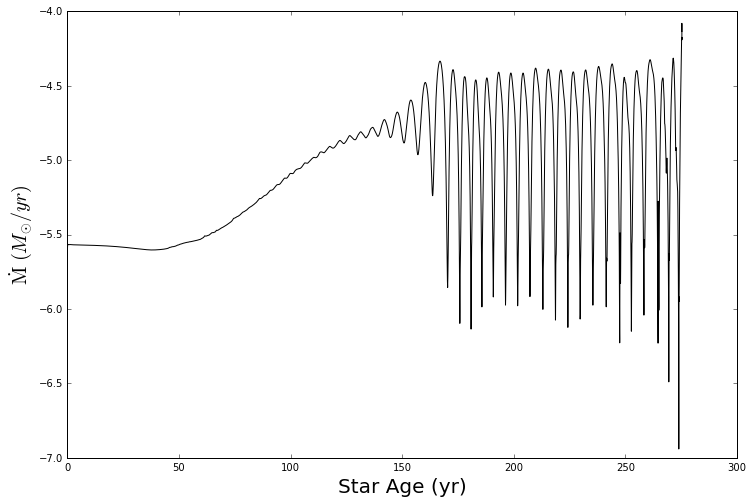

In [175]:
plt.plot(a.history['star_age'], a.history["log_abs_mdot"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"${\rm \dot{M}}\ (M_{\odot}/yr)$", size=20)
plt.show()

Process running in parallel on  48  cores


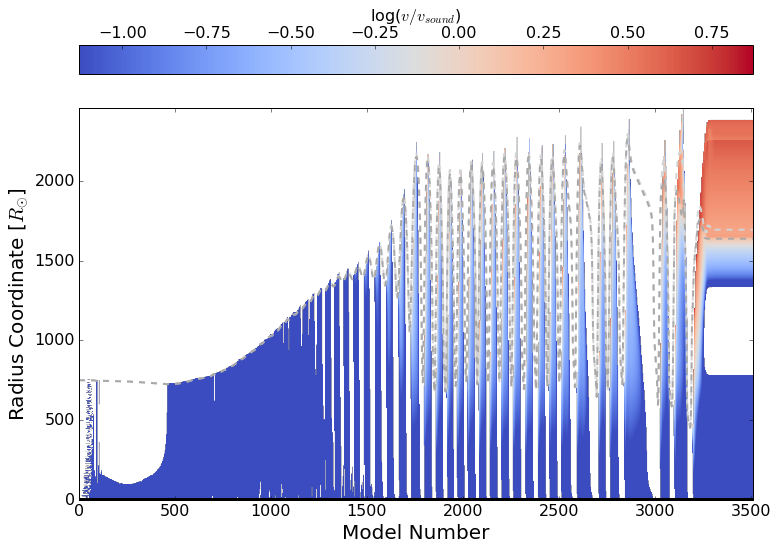

In [176]:
a.SetParameters(Yaxis="radius", Xaxis='model_number',Variable='v_div_csound', cmap_dynamic_range=2,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


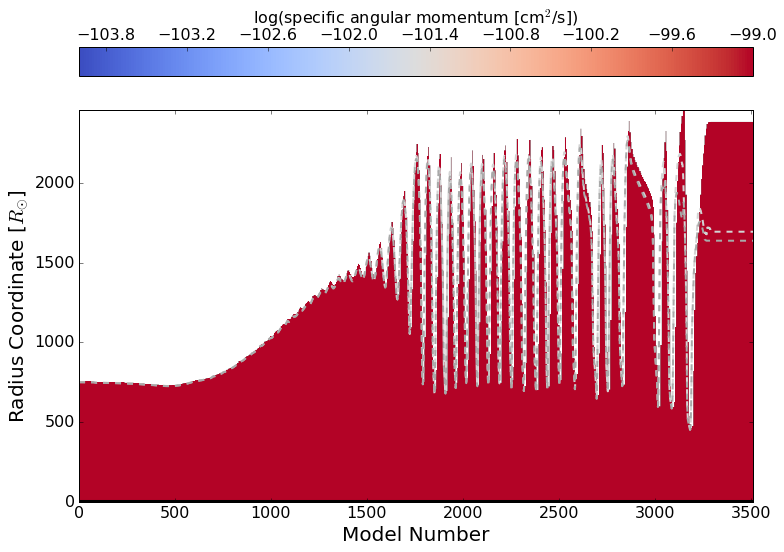

In [177]:
a.SetParameters(Yaxis="radius", Variable='j_rot', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


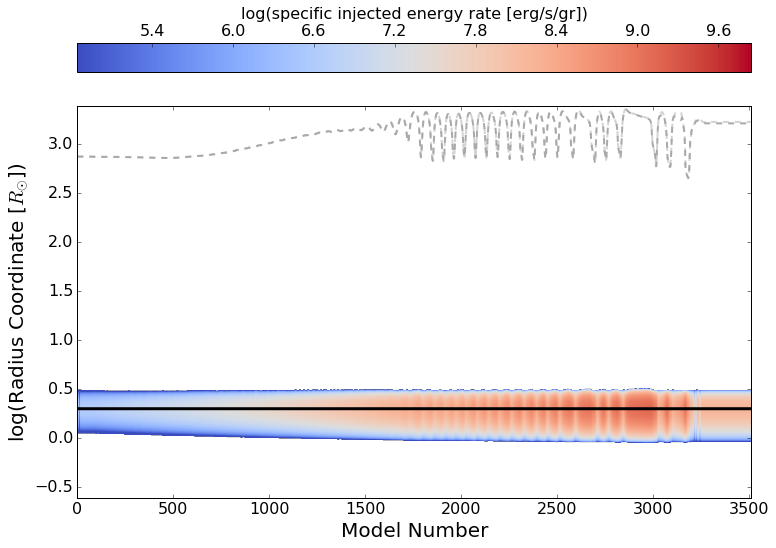

In [178]:

a.SetParameters(Yaxis="log_radius", Variable='extra_heat', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


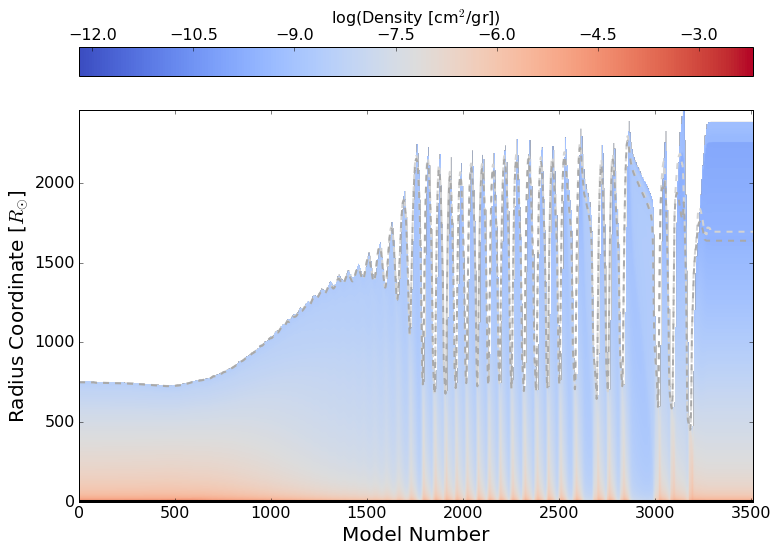

In [179]:
a.SetParameters(Yaxis="radius", Variable='density', cmap_dynamic_range=10,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


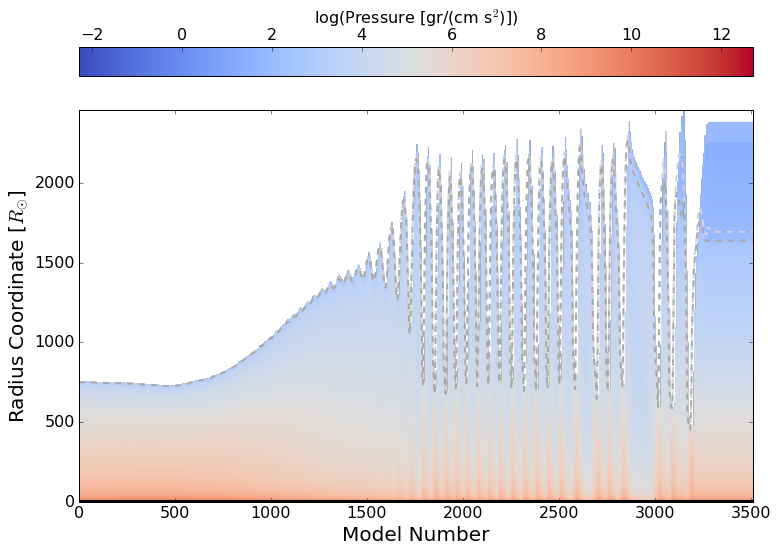

In [180]:
a.SetParameters(Yaxis="radius", Variable='pressure', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


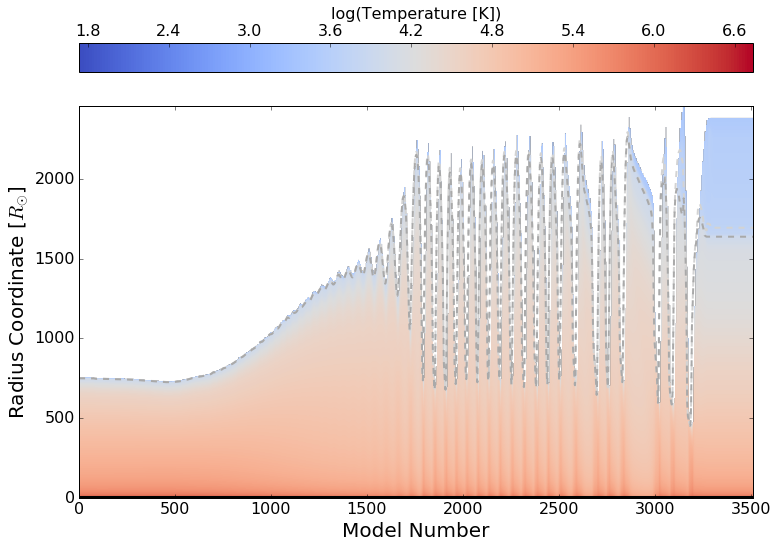

In [181]:
a.SetParameters(Yaxis="radius", Variable='temperature', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()